In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import os
for dirname, _, filenames in os.walk('Downloads/IMDB Dataset (1).csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df_review = pd.read_csv("Downloads/IMDB Dataset.csv")
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df_positive = df_review[df_review['sentiment']=='positive'][:15000]
df_negative = df_review[df_review['sentiment']=='negative'][:3000]

df_review_imb = pd.concat([df_positive,df_negative ])
print(df_review_imb)

                                                 review sentiment
0     One of the other reviewers has mentioned that ...  positive
1     A wonderful little production. <br /><br />The...  positive
2     I thought this was a wonderful way to spend ti...  positive
4     Petter Mattei's "Love in the Time of Money" is...  positive
5     Probably my all-time favorite movie, a story o...  positive
...                                                 ...       ...
5939  Something somewhere must have terribly gone wr...  negative
5942  This was the next to last film appearance by J...  negative
5946  I give this movie a 4 cause I'm a die hard fan...  negative
5947  Are we serious??? I mean wow ... just, wow. I ...  negative
5948  I have no respect for IMDb ratings anymore. I ...  negative

[18000 rows x 2 columns]


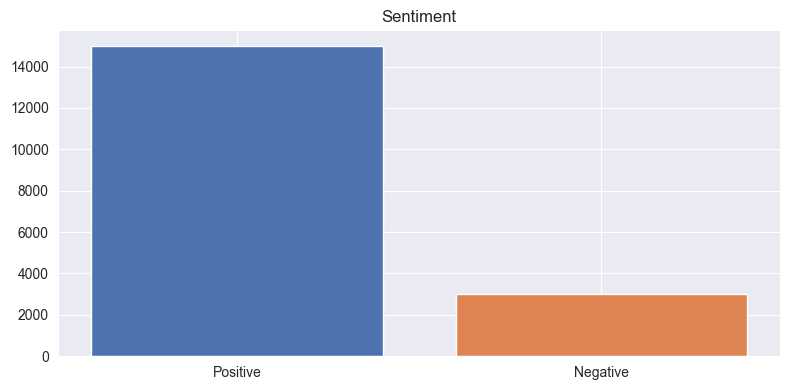

In [5]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [6]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])


df_review_bal

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
20868,Watching film i was in very light mood and als...,positive
17156,Saw this last night at the 7th Annual NYC Home...,positive
25519,"almost 4 years after the events of 911, if ask...",positive
19073,just another showcase of led zeppelin at their...,positive


In [7]:
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

sentiment
positive    15000
negative     3000
Name: count, dtype: int64
sentiment
negative    3000
positive    3000
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review_bal,test_size =0.33,random_state=42)

In [9]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [10]:
train_y.value_counts()

sentiment
positive    2033
negative    1987
Name: count, dtype: int64

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
test_x_vector = tfidf.transform(test_x)

In [12]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,0069,007,01,01pm,02,03,04,05,...,æon,élan,étoile,ísnt,île,ïn,önsjön,über,übermensch,überwoman
6430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [14]:
print(svc.score(test_x_vector, test_y))

0.8691919191919192


In [15]:
print(svc.predict(tfidf.transform(['Its a good movie'])))
print(svc.predict(tfidf.transform(['The best part about this movie is thst it ends'])))
print(svc.predict(tfidf.transform(['This film deserves an Oscar for making me appreciate the value of a two-hour nap.'])))
print(svc.predict(tfidf.transform(['This movie is a waste of time'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['positive']
['negative']
['positive']
['negative']


In [16]:
accuracy = svc.score(test_x_vector, test_y)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.8691919191919192


In [17]:
from sklearn.metrics import f1_score
f1_score(test_y,svc.predict(test_x_vector),
          labels = ['positive','negative'],average=None)

array([0.86978381, 0.86859462])

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.85      0.89      0.87       967
    negative       0.89      0.85      0.87      1013

    accuracy                           0.87      1980
   macro avg       0.87      0.87      0.87      1980
weighted avg       0.87      0.87      0.87      1980



In [19]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = ['positive', 'negative'])
conf_mat

array([[865, 102],
       [157, 856]], dtype=int64)

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


svc = SVC(kernel='linear')

param_grid = {
    'C': [0.1, 0.5, 1, 10],
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(train_x_vector, train_y)

print("Best hyperparameters: ", grid_search.best_params_)

best_svc = grid_search.best_estimator_

accuracy = best_svc.score(test_x_vector, test_y)
print("Accuracy on the test set after tuning: {:.2f}".format(accuracy))


Best hyperparameters:  {'C': 0.5}
Accuracy on the test set after tuning: 0.86


In [21]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(train_x_vector, train_y, test_size=0.2, random_state=42)

nb = MultinomialNB()

nb.fit(X_train, y_train)

accuracy_before_tuning = nb.score(X_test, y_test)
print("Accuracy on the test set before tuning: {:.2f}".format(accuracy_before_tuning))

param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters (Naive Bayes): ", grid_search.best_params_)

best_nb = grid_search.best_estimator_
accuracy_after_tuning = best_nb.score(X_test, y_test)
print("Accuracy on the test set after tuning: {:.2f}".format(accuracy_after_tuning))


Accuracy on the test set before tuning: 0.85
Best hyperparameters (Naive Bayes):  {'alpha': 10}
Accuracy on the test set after tuning: 0.84


In [22]:
from sklearn.metrics import f1_score

predicted_labels_after_tuning = best_nb.predict(X_test)

f1_score_after_tuning = f1_score(y_test, predicted_labels_after_tuning, labels=['positive', 'negative'], average=None)
print(f1_score_after_tuning)

[0.83183569 0.84197829]


In [23]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(train_x_vector, train_y, test_size=0.2, random_state=42)

lr = LogisticRegression(solver='lbfgs')

lr.fit(X_train, y_train)

accuracy_before_tuning = lr.score(X_test, y_test)
print("Accuracy on the test set before tuning: {:.2f}".format(accuracy_before_tuning))

param_grid = {
    'C': [ 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters (Logistic Regression): ", grid_search.best_params_)

best_lr = grid_search.best_estimator_
accuracy_after_tuning = best_lr.score(X_test, y_test)
print("Accuracy on the test set after tuning: {:.2f}".format(accuracy_after_tuning))


Accuracy on the test set before tuning: 0.86


C:\Users\Adarsh Chamola\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best hyperparameters (Logistic Regression):  {'C': 10}
Accuracy on the test set after tuning: 0.87


In [24]:
from sklearn.metrics import f1_score

predicted_labels_after_tuning = best_lr.predict(X_test)

f1_score_after_tuning = f1_score(y_test, predicted_labels_after_tuning, labels=['positive', 'negative'], average=None)
print(f1_score_after_tuning)


[0.8660826  0.86773795]


In [25]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train_x_vector, train_y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

accuracy_before_tuning = rf.score(X_test, y_test)
print("Accuracy on the test set before tuning: {:.2f}".format(accuracy_before_tuning))

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters (Random Forest): ", grid_search.best_params_)

best_rf = grid_search.best_estimator_
accuracy_after_tuning = best_rf.score(X_test, y_test)
print("Accuracy on the test set after tuning: {:.2f}".format(accuracy_after_tuning))


Accuracy on the test set before tuning: 0.84
Best hyperparameters (Random Forest):  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on the test set after tuning: 0.83


In [26]:
from sklearn.metrics import f1_score

predicted_labels_after_tuning = best_rf.predict(X_test)

f1_score_after_tuning = f1_score(y_test, predicted_labels_after_tuning, labels=['positive', 'negative'], average=None)
print(f1_score_after_tuning)


[0.83028083 0.82382763]
